## Python数据科学(Matplotlib)课件
本教程内容主要来源于《Python数据科学手册》 第四章 
供2018年小学期 Python数据科学 课程使用 
PowerBy 刘相 

>* 本章详细介绍Python的Matplotlib工具实现数据可视化的方法 
>* Matplotlib最初只是IPython的一个补丁，希望画出类似于Matlab风格类似的交互图形
>* Matplotlib最重要的特性之一是具有良好的操作系统兼容性和图形显示底层接口兼容性；跨平台面面俱到的特点使其成为最强大的功能之一
>* 近些年Matlab相比较Html5 canvas风格可能跟不上时代,但其仍作为一种重要的可视化分析软件。HTML5风格的作图我们最后给一个简单介绍

### 1 Matplotlib常用技巧

### 导入Matplotlib
plt是最常用的接口

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### 设置绘图样式
只需要知道matplot有不同的样式，我们一般选用经典风格的样式
### IPython NoteBook中绘图
IPython Notebook 是一款基于浏览器的交互式数据分析工具，可以将描述性文字、代码、图形、HTMl元素以及更多的媒体形式组合，集成到单个Notebook文档
有两种展现形式
>* %matplotlib notebook 会在Notebook中启动交互式图形
>* %matplotlib inline 会在Notebook中启动静态的图形

一个简单的案例

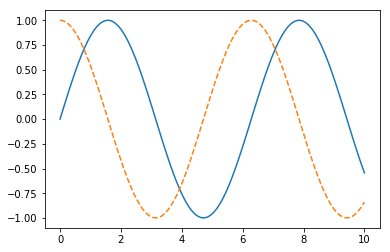

In [11]:
%matplotlib inline

import numpy as np
x = np.linspace(0,10,100)

fig = plt.figure()
plt.plot(x, np.sin(x),'-')
plt.plot(x, np.cos(x),'--')

### 将图形保存为文件

In [12]:
fig.savefig('my_fig.png')

#获取可能的文件保存格式
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## 2 两种画图接口

### matlab风格的接口

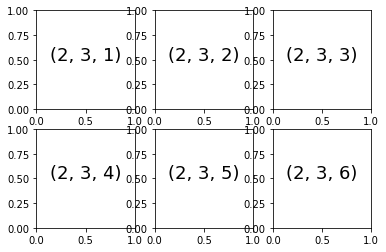

In [35]:
# 创建图形
plt.figure()

# 创建两个子图中的一个
plt.subplot(2,1,1) #(行、列、子图标号)
plt.plot(x,np.sin(x))

# 创建两个子图中的另一个
plt.subplot(2,1,2) #(行、列、子图标号)
plt.plot(x,np.cos(x))

# 大表中的子图顺序
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha='center')

### 面向对象接口

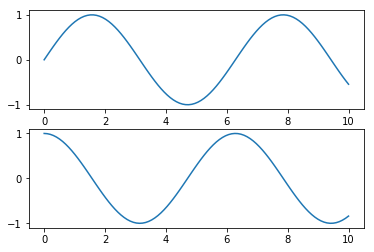

In [16]:
# 先创建图形网络
# ax是一个包含两个Axes对象的数组
fig, ax = plt.subplots(2)

# 在每个对象上调用plot()方法
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

## 3 简易线形图


>* Matplotlib中需要先创建一个图形fig和坐标轴ax 
>* figure可以被看成一个容纳各种坐标轴、图形、文字、标签的容器。就想图中的那样
>* axes是一个带有刻度和标签的举行，最终会包含所有的可视化图形元素。

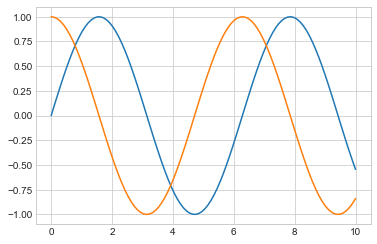

In [34]:
fig = plt.figure()

x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### 调整图形： 线条的颜色和风格

>* color属性 用来调整线条的颜色，他可以接收以下形式的参数：标准颜色名称（blue）,缩写颜色代码（g），范围在0-1的灰度值（0.75）十六进制值（#FFDD44）RGB元组（1.0,0.2,0.3）HTML颜色名称（chartreuse）
>* linestyle属性 用来调整线条的线型，其可以接受以下名称或简写 （solid、dashed、dashdot 、dotted）（- -- -. :）

### 调整图形： 坐标轴上下限
>* xlim与ylim属性 用来调整坐标轴的上下限，并且在需要情况下可以出现刻度值逆序，还可以调整长宽比例

### 调整图形：设置图形标签
>* 当显示多条曲线时、创建图例是很有效的办法。使用title为整个图创建标签，使用label为每条曲线创建标签

### 调整图形：设置图例
>* 通过`plt.legend`来为图设置图例，具体参数请参考手册

下面是一个简单曲线的综合案例

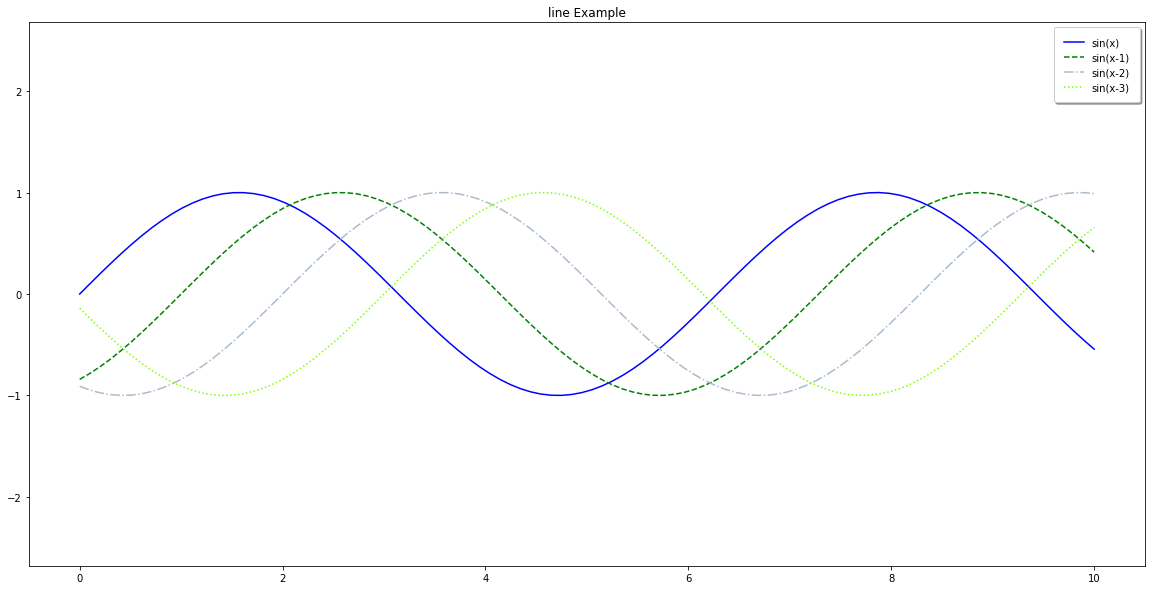

In [24]:
fig = plt.figure(figsize=(20,10))

# 生成样例数据
x = np.linspace(0,10,100)
# 设置图标标题
plt.title('line Example')
# 画若干条曲线 改变函数、颜色、线性、增加图例
plt.plot(x, np.sin(x),color='blue',linestyle='-',label='sin(x)')
plt.plot(x, np.sin(x-1),color='g',linestyle='--',label='sin(x-1)')
plt.plot(x, np.sin(x-2),color='#AABBCC',linestyle='-.',label='sin(x-2)')
plt.plot(x, np.sin(x-3),color='chartreuse',linestyle=':',label='sin(x-3)')
# 使得坐标轴等间距
plt.axis('equal')
# 设置图例
plt.legend(fancybox=True,shadow=True,borderpad=1)

## 4 简易散点图

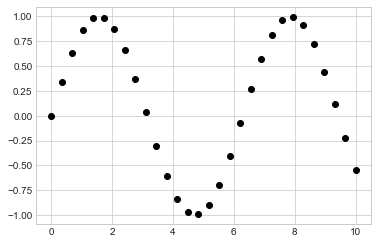

In [65]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color='black')

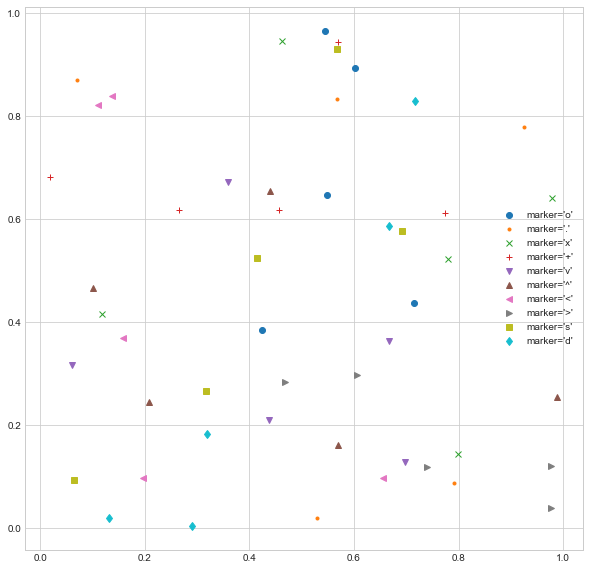

In [98]:
# 为了使图像显得清晰 放大图像
fig = plt.figure(figsize=(10,10))

# 设置随机数种子，以正态分布产生随机数，利用随机数产生随机的坐标
# 遍历各种类型的图标
rng = np.random.RandomState(0)
for marker in ['o','.','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5), rng.rand(5),marker,label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)

### 用plt.scatter 画散点图

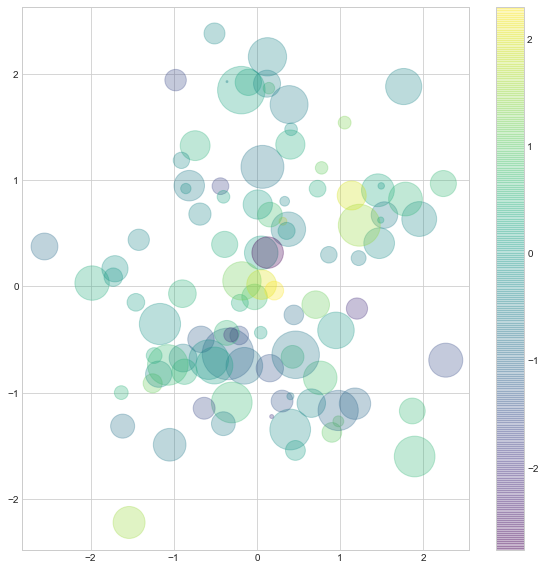

In [90]:
# 为了使图像显得清晰 放大图像
fig = plt.figure(figsize=(10,10))
# 设置随机数种子，以正态分布产生随机数，利用随机数产生随机的坐标、颜色、大小
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.randn(100)
sizes = 1000 * abs(rng.randn(100))

plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar()

### 实际案例：鸢尾花的可视化
> ris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

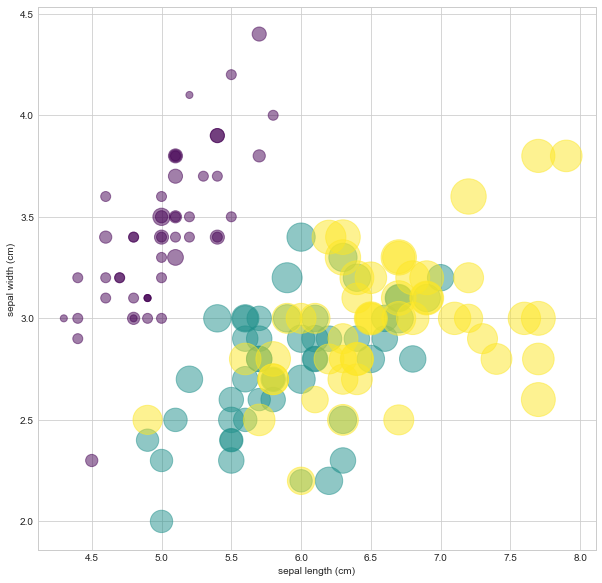

In [112]:
# 为了使图像显得清晰 放大图像
fig = plt.figure(figsize=(10,10))
#鸢尾花数据集导入、利用sklearn包 
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T
# 画散点图，包含坐标轴（第1、2个属性为x和y轴）透明度、大小（第三个属性）、颜色（花的种类）、及颜色映射
plt.scatter(features[0],features[1],alpha=0.5,s=500*features[3],c=iris.target,cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()

## 5 可视化异常处理

<Container object of 3 artists>

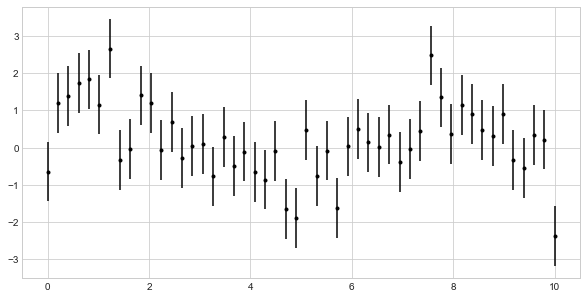

In [116]:
fig = plt.figure(figsize=(10,5))

# 生成连续的点，设置一个误差限
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
# 画出带误差的散点图
plt.errorbar(x,y,yerr=dy,fmt='.k')

### 连续误差
有时候可能需要显示连续变量的误差，可以使用plt.plot方法和plt.fill_between方法来解决这个问题。我们使用scikit-Learn程序库API中一个简单的高斯过程回归方法来演示，这是一种灵活的非参数方程对带有不确定的连续测量值进行拟合的方法。

In [22]:
import numpy as np
from sklearn.gaussian_process import GaussianProcess
model = lambda x:x*np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,random_start=100)
gp.fit(xdata[:,np.newaxis],ydata)

xfit = np.linspace(0,10,1000)
yfit,MSE = gp.predict(xfit[:,np.newaxis],eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

C:\ana\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function constant is deprecated; The function constant of regression_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed i

C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings

C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\ana\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function cubic is deprecated; The function cubic of correlation_models is deprecated in version 0.19.1 and will be removed in 0.22.
  warnings

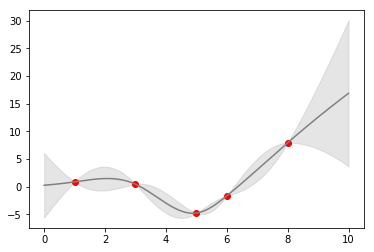

In [23]:
fig = plt.figure()
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')
plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,color='gray',alpha=0.2)

## 6 密度图与等高线图

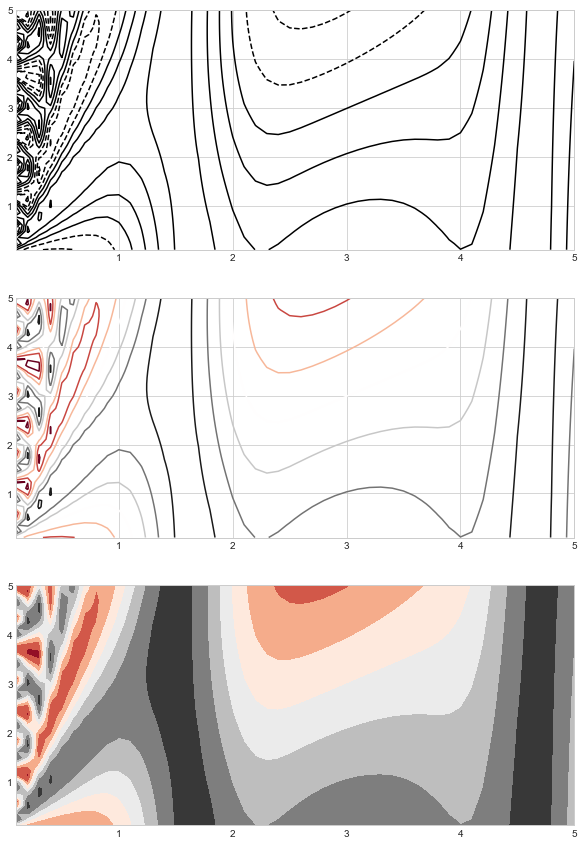

In [136]:
fig = plt.figure(figsize=(10,15))
# 定义一个高度生成函数
def f(x,y):
    return np.sin(x)**10+np.cos(10+y/x)*np.cos(x)

# 生成x、y坐标 生成网格矩阵
x = np.linspace(0.1,5,50)
y = np.linspace(0.1,5,40)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

# 画等高图
plt.subplot(3,1,1)
plt.contour(X,Y,Z,colors='black')

plt.subplot(3,1,2)
plt.contour(X,Y,Z,cmap='RdGy')

plt.subplot(3,1,3)
plt.contourf(X,Y,Z,cmap='RdGy')

## 7 频次直方图、数据区间划分和分布密度

(array([ 0.00516752,  0.02067006,  0.02067006,  0.02067006,  0.03100509,
         0.05167515,  0.07234521,  0.13952291,  0.14985794,  0.20153309,
         0.22737067,  0.32555346,  0.32038594,  0.45474134,  0.34622352,
         0.44440631,  0.36172606,  0.42890376,  0.28938085,  0.27904582,
         0.25837576,  0.18603055,  0.14469043,  0.11368533,  0.08268024,
         0.0671777 ,  0.04650764,  0.04134012,  0.02067006,  0.01550255]),
 array([-3.04614305, -2.85262645, -2.65910984, -2.46559324, -2.27207663,
        -2.07856003, -1.88504342, -1.69152682, -1.49801021, -1.3044936 ,
        -1.110977  , -0.91746039, -0.72394379, -0.53042718, -0.33691058,
        -0.14339397,  0.05012264,  0.24363924,  0.43715585,  0.63067245,
         0.82418906,  1.01770566,  1.21122227,  1.40473887,  1.59825548,
         1.79177209,  1.98528869,  2.1788053 ,  2.3723219 ,  2.56583851,
         2.75935511]),
 <a list of 30 Patch objects>)

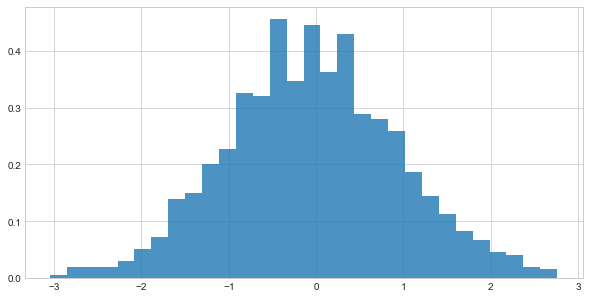

In [149]:
fig = plt.figure(figsize=(10,5))
rng = np.random.RandomState(0)
data =  rng.randn(1000)
plt.hist(data,bins=30,normed=True,alpha=0.8)

(array([  1.,   4.,   4.,   4.,   6.,  10.,  14.,  27.,  29.,  39.,  44.,
         63.,  62.,  88.,  67.,  86.,  70.,  83.,  56.,  54.,  50.,  36.,
         28.,  22.,  16.,  13.,   9.,   8.,   4.,   3.]),
 array([-3.04614305, -2.85262645, -2.65910984, -2.46559324, -2.27207663,
        -2.07856003, -1.88504342, -1.69152682, -1.49801021, -1.3044936 ,
        -1.110977  , -0.91746039, -0.72394379, -0.53042718, -0.33691058,
        -0.14339397,  0.05012264,  0.24363924,  0.43715585,  0.63067245,
         0.82418906,  1.01770566,  1.21122227,  1.40473887,  1.59825548,
         1.79177209,  1.98528869,  2.1788053 ,  2.3723219 ,  2.56583851,
         2.75935511]),
 <a list of 30 Patch objects>)

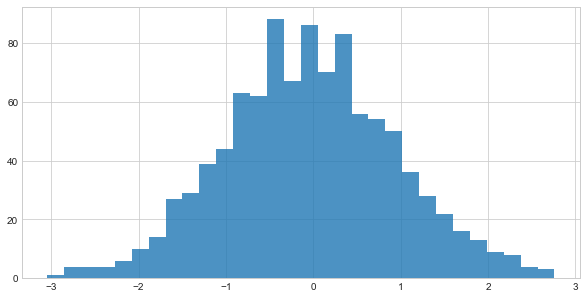

In [150]:
fig = plt.figure(figsize=(10,5))

rng = np.random.RandomState(0)
data =  rng.randn(1000)
plt.hist(data,bins=30,alpha=0.8)

## 8 案例 手写数字

每个数字由64像素的色相组成，因此可以将每个数字看成一个位于64维空间的点，每个维度表示一个像素的亮度。但是通过可视化来描述如此高维空间的技术是困困难的

一个可行的方案是降维技术，在尽量保持数据内部重要关联性的同时降低数据的维度，例如流行学习，降维是无监督学习的重要内容

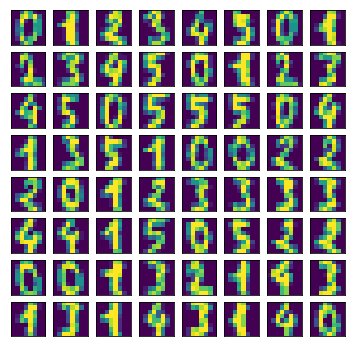

In [27]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8,8,figsize=(6,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap='viridis')
    axi.set(xticks=[],yticks=[])

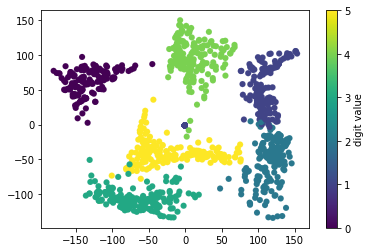

In [29]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:,0],projection[:,1],lw=0.1,c=digits.target,cmap='viridis')
plt.colorbar(ticks=range(6),label='digit value')

## 8 用Matplotlib画三维图

In [39]:
input(a)

NameError: name 'a' is not defined